<a href="https://colab.research.google.com/github/tishasaklecha/climate-change-co2-forecasting/blob/main/Climate_Change_CO2_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# ===============================
# 1️⃣ IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet

In [11]:
# ===============================
# 2️⃣ DOWNLOAD DATASETS
# ===============================

# CO2 + CH4 + N2O Dataset
!wget https://github.com/owid/co2-data/raw/master/owid-co2-data.csv -O owid-co2-data.csv

# NASA Global Temperature
!wget https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv -O global_temp.csv

# Renewable Energy Dataset
!wget https://github.com/owid/energy-data/raw/master/owid-energy-data.csv -O owid-energy-data.csv

--2025-10-19 16:55:03--  https://github.com/owid/co2-data/raw/master/owid-co2-data.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv [following]
--2025-10-19 16:55:03--  https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14280395 (14M) [text/plain]
Saving to: ‘owid-co2-data.csv’

owid-co2-data.csv   100%[===================>]  13.62M  --.-KB/s    in 0.08s   

2025-10-19 16:55:03 (161 MB/s) - ‘owid-co2-data.csv’ saved [14280395/14280395]

--2025-10-19 16:55:03--  https://data.giss.nasa.g

In [12]:
# ===============================
# 3️⃣ LOAD DATASETS
# ===============================
co2_df = pd.read_csv('owid-co2-data.csv')
temp_df = pd.read_csv('global_temp.csv', skiprows=1)  # skip header rows
energy_df = pd.read_csv('owid-energy-data.csv')

In [13]:
# ===============================
# 4️⃣ PREPROCESS CO2 DATA
# ===============================
# Keep relevant columns (population included)
co2_df = co2_df[['country','year','co2','methane','nitrous_oxide','population']]

In [14]:
# ===============================
# 5️⃣ PREPROCESS ENERGY DATA
# ===============================
# Keep renewable energy column
energy_df = energy_df[['country','year','renewables_share_energy']]

# Merge CO2 and Energy datasets
co2_df = pd.merge(co2_df, energy_df, on=['country','year'], how='left')

In [15]:
# ===============================
# 6️⃣ PREPROCESS TEMPERATURE DATA
# ===============================
# Keep only 'Year' and 'J-D' (Annual mean anomaly)
temp_df = temp_df[['Year','J-D']]
temp_df.rename(columns={'Year':'year', 'J-D':'temp_anomaly'}, inplace=True)

# Convert 'year' to numeric
temp_df['year'] = pd.to_numeric(temp_df['year'], errors='coerce')
temp_df['temp_anomaly'] = pd.to_numeric(temp_df['temp_anomaly'], errors='coerce')

In [16]:
# ===============================
# 7️⃣ MERGE CO2 + TEMPERATURE
# ===============================
merged_df = pd.merge(co2_df.groupby('year').sum().reset_index(), temp_df, on='year', how='inner')

In [17]:
# ===============================
# 8️⃣ CHECK DATA
# ===============================
print("Merged Data Sample:")
print(merged_df.head())

# Check columns
print("\nColumns in merged dataset:")
print(merged_df.columns)

Merged Data Sample:
   year                                            country       co2  \
0  1880  AfghanistanAfricaAfrica (GCP)AlbaniaAlgeriaAnd...  6440.028   
1  1881  AfghanistanAfricaAfrica (GCP)AlbaniaAlgeriaAnd...  6654.100   
2  1882  AfghanistanAfricaAfrica (GCP)AlbaniaAlgeriaAnd...  6999.710   
3  1883  AfghanistanAfricaAfrica (GCP)AlbaniaAlgeriaAnd...  7435.887   
4  1884  AfghanistanAfricaAfrica (GCP)AlbaniaAlgeriaAnd...  7499.582   

    methane  nitrous_oxide    population  renewables_share_energy  \
0  8240.000       1305.913  6.126173e+09                      0.0   
1  8337.434       1320.283  4.499828e+09                      0.0   
2  8433.948       1332.655  4.531081e+09                      0.0   
3  8543.000       1343.445  4.564126e+09                      0.0   
4  8599.836       1353.047  4.597576e+09                      0.0   

   temp_anomaly  
0         -0.17  
1         -0.09  
2         -0.11  
3         -0.17  
4         -0.28  

Columns in merged datas

In [18]:
# ===============================
# 9️⃣ SAVE CLEAN DATA (Optional)
# ===============================
merged_df.to_csv('cleaned_climate_data.csv', index=False)

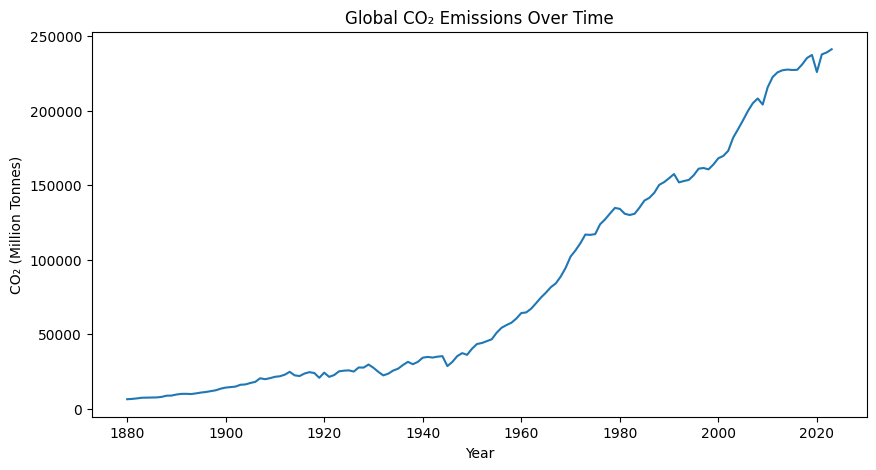

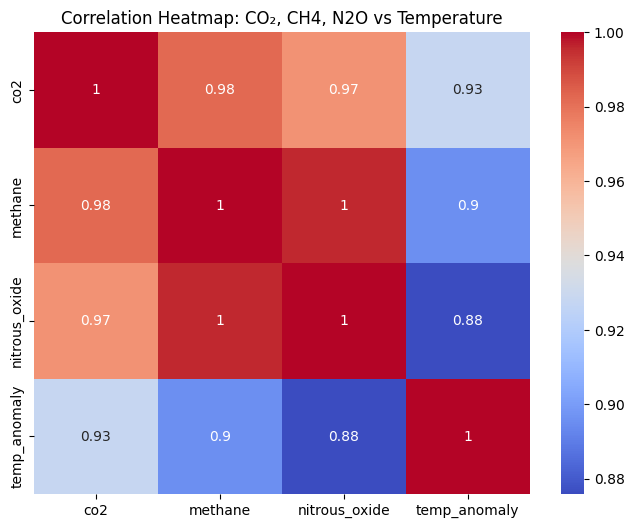

In [19]:
# ===============================
# 1️⃣0️⃣ QUICK VISUALIZATION EXAMPLE
# ===============================
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='co2', data=merged_df)
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (Million Tonnes)")
plt.show()

# Optional: CO2 vs Temperature correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['co2','methane','nitrous_oxide','temp_anomaly']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: CO₂, CH4, N2O vs Temperature")
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ifa3iim/dkdmj6q3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ifa3iim/h7i9u_0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15818', 'data', 'file=/tmp/tmp3ifa3iim/dkdmj6q3.json', 'init=/tmp/tmp3ifa3iim/h7i9u_0l.json', 'output', 'file=/tmp/tmp3ifa3iim/prophet_modelnpyiw_k6/prophet_model-20251019165535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:55:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:55:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/

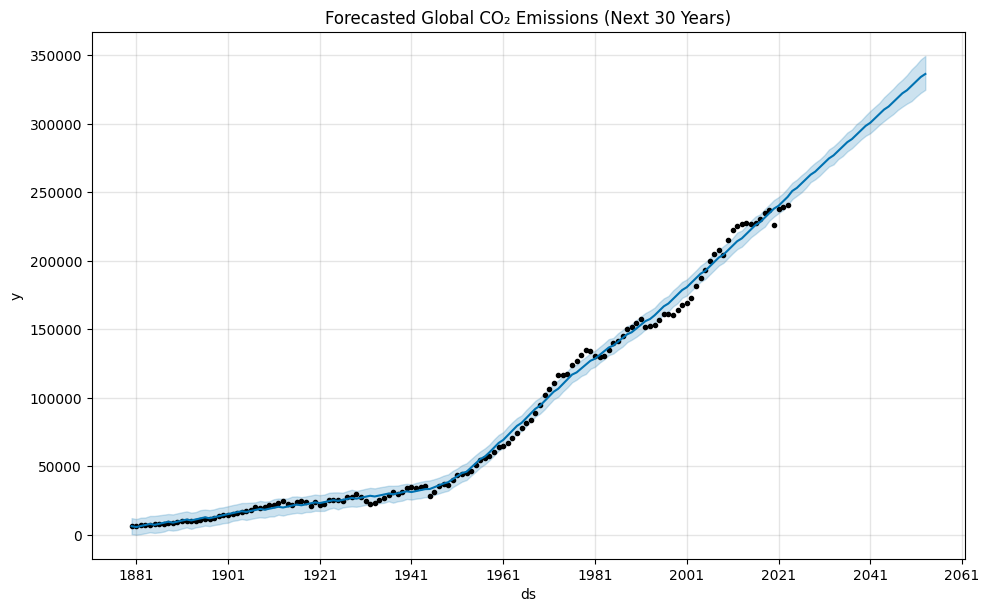

In [20]:
# ===============================
# 1️⃣1️⃣ READY FOR FORECASTING
# ===============================
# Example Prophet Forecast for CO2
df_prophet = merged_df[['year','co2']].rename(columns={'year':'ds','co2':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30, freq='Y')  # Forecast next 30 years
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecasted Global CO₂ Emissions (Next 30 Years)")
plt.show()